-1

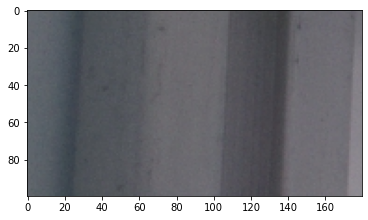

In [4]:
import cv2
import matplotlib.pylab as plt

# Reading the image
source = cv2.imread("1.jpg",1)

#scaleX is scale factor in x direction
#scaleY is scale factor in y direction
scaleX = 0.6
scaleY = 0.6


# Scaling Down the image 0.6 times
scaleDown = cv2.resize(source, None, fx= scaleX, fy= scaleY, interpolation= cv2.INTER_LINEAR)

# Scaling up the image 1.8 times
scaleUp = cv2.resize(source, None, fx= scaleX*3, fy= scaleY*3, interpolation= cv2.INTER_LINEAR)

#Cropped Image
crop = source[50:150,20:200]

# Displaying all the images
plt.imshow(source)
plt.imshow(scaleDown)
plt.imshow(scaleUp)
plt.imshow(crop)

cv2.waitKey(0)

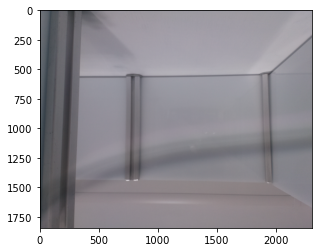

In [5]:

plt.imshow(scaleUp)

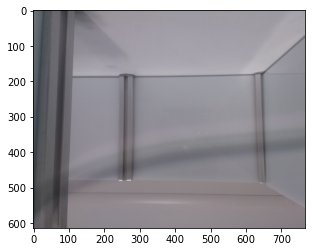

In [6]:

plt.imshow(scaleDown)

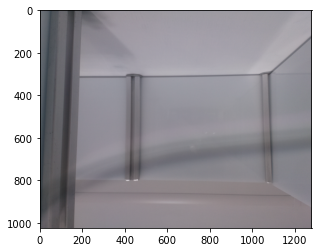

In [7]:
plt.imshow(source)

[[  0   0   0 ... 255 255 255]
 [  0   0   0 ... 255 255 255]
 [  0   0   0 ... 255 255 255]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]


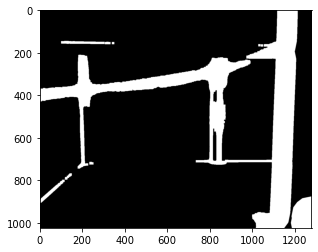

In [32]:
# noise removal
kernel = np.ones((3,3),np.uint8)
opening = cv.morphologyEx(thresh,cv.MORPH_OPEN,kernel, iterations = 2)
# sure background area
sure_bg = cv.dilate(opening,kernel,iterations=3)
# Finding sure foreground area
dist_transform = cv.distanceTransform(opening,cv.DIST_L2,5)
ret, sure_fg = cv.threshold(dist_transform,0.5*dist_transform.max(),255,0)
# Finding unknown region
sure_fg = np.uint8(sure_fg)
unknown = cv.subtract(sure_bg,sure_fg)
print(sure_fg)
plt.imshow(fixColor(unknown))

In [6]:
# Marker labelling
ret, markers = cv.connectedComponents(sure_fg)
# Add one to all labels so that sure background is not 0, but 1
markers = markers+1
# Now, mark the region of unknown with zero
markers[unknown==255] = 0

In [7]:
markers = cv.watershed(img,markers)
img[markers == -1] = [255,0,0]

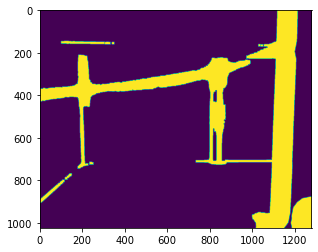

In [34]:
plt.imshow(unknown)